In [ ]:
"""
Introdução à User Story US09: Análise Estatística de Consumo de Água em Parques Verdes

A User Story US09, intitulada "Análise Estatística de Consumo de Água em Parques Verdes", visa fornecer aos Gerentes de Espaços Verdes (GSM) informações precisas sobre os custos referentes ao consumo de água em espaços verdes específicos. Essa análise permite uma gestão eficiente dos gastos relacionados à água, garantindo uma alocação adequada de recursos financeiros.

Para atender a essa demanda, a US09 propõe uma série de funcionalidades implementadas por meio de código Python, utilizando o conjunto de dados disponibilizado no arquivo "water_consumption.csv". Este arquivo registra o consumo diário de água (em metros cúbicos - m³) desde a abertura de cada parque verde. O custo da água é de 0,7 AC/m³, até um consumo de 1000m³/mês, sendo aplicada uma taxa adicional de 15% para níveis de consumo mais elevados.

As funcionalidades incluídas nesta US são as seguintes:

1. Barplot Representando o Consumo Mensal de Água: Um gráfico de barras é gerado para representar o consumo mensal de água em um determinado parque verde. O usuário especifica o ano, o período de tempo (mês inicial e final) e a identificação do parque.

2. Média dos Custos Mensais de Consumo de Água: Calcula a média dos custos mensais relacionados ao consumo de água para cada parque verde. O usuário define o número de parques a serem analisados e a identificação de cada parque.

3. Análise Estatística Comparativa: Realiza uma análise comparativa entre o parque com o maior e o menor consumo de água. As seguintes estatísticas são calculadas e comparadas para esses dois parques:
   - Média
   - Mediana
   - Desvio padrão
   - Coeficiente de assimetria

Além disso, a análise inclui a construção de tabelas de frequência relativa e absoluta para os dados classificados em 5 classes. Também são identificados outliers em cada conjunto de dados, considerando a definição de valores que se desviam da mediana em mais de 1,5 vezes o intervalo interquartil. Finalmente, os dados são representados graficamente através de histogramas com 10 e 100 classes para cada parque.

Essas funcionalidades fornecem uma compreensão abrangente do consumo de água nos parques verdes, permitindo uma gestão eficaz dos recursos financeiros e uma tomada de decisão informada pelos Gerentes de Espaços Verdes.
"""


Statistics for park with highest consumption (Cidade):
Mean: 116.24058906230263
Median: 85.995
Standard Deviation: 71.72487101415582
Coefficient of Skewness: 3.986003236968961

Statistics for park with lowest consumption (ArcaAgua):
Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899769
Coefficient of Skewness: 2.1584305490605726

Relative Frequency Table for park with highest consumption(Cidade):
Consumption
(0.0, 184.531]        0.835526
(184.531, 369.062]    0.146930
(369.062, 553.593]    0.004386
(553.593, 738.124]    0.000000
(738.124, 922.655]    0.002193
Name: count, dtype: float64

Absolute Frequency Table for park with highest consumption(Cidade):
Consumption
(0.0, 184.531]        381
(184.531, 369.062]     67
(369.062, 553.593]      2
(553.593, 738.124]      0
(738.124, 922.655]      1
Name: count, dtype: int64

Relative Frequency Table for park with lowest consumption(ArcaAgua):
Consumption
(0.0, 184.531]        0.997807
(184.531, 369.062]    0.000

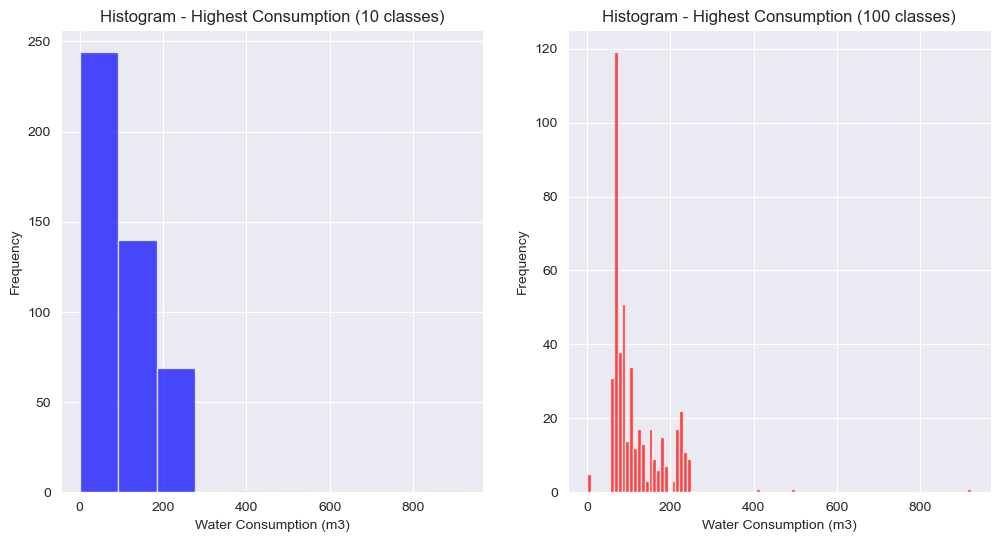

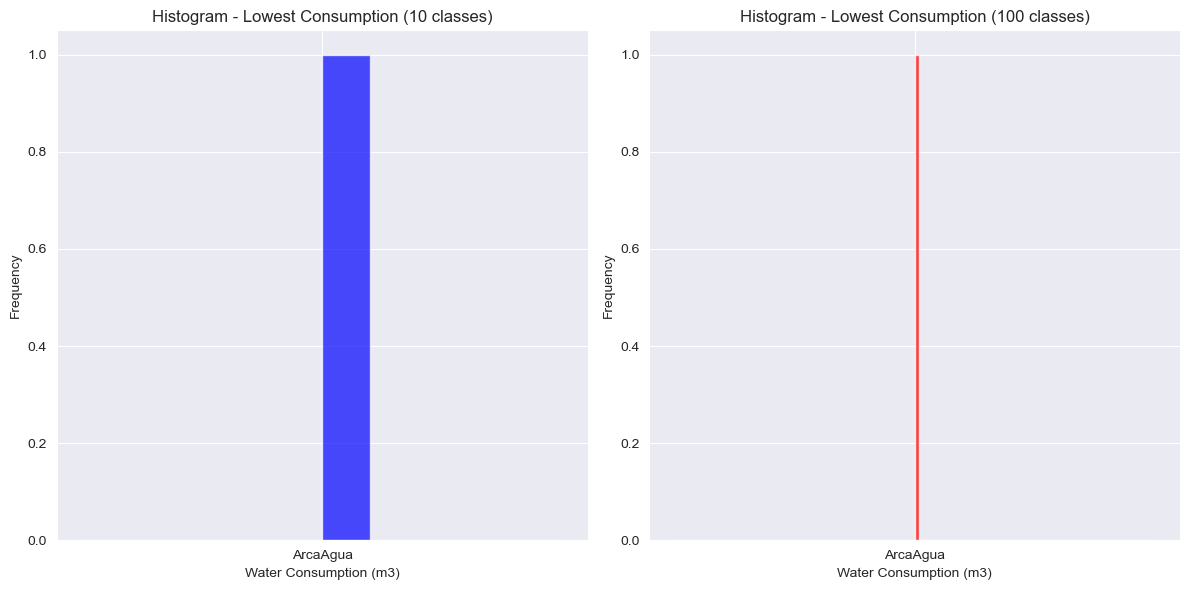

Statistics for park with highest consumption (Cidade):
Mean: 116.24058906230263
Median: 85.995
Standard Deviation: 71.72487101415582
Coefficient of Skewness: 3.986003236968961

Statistics for park with lowest consumption (ArcaAgua):
Mean: 8.99599282623465
Median: 6.7718554315
Standard Deviation: 4.852369347899769
Coefficient of Skewness: 2.1584305490605726


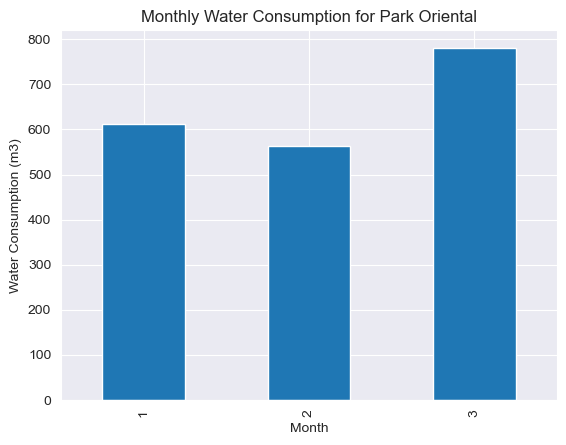

In [29]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew

# Passo 1: Ler o arquivo CSV e armazenar os dados em uma estrutura de dados
data = pd.read_csv("../datasetsMATCP/water_consumption.csv", sep=";", decimal=",")

# Passo 2: Implementar funções para as operações exigidas pela user story

def barplot_water_consumption(data, park_id, year, start_month, end_month):
    filtered_data = data[(data['Park'] == park_id) & (data['Year'] == year) & (data['Month'] >= start_month) & (data['Month'] <= end_month)]
    monthly_consumption = filtered_data.groupby('Month')['Consumption'].sum()
    monthly_consumption.plot(kind='bar')
    plt.xlabel('Month')
    plt.ylabel('Water Consumption (m3)')
    plt.title('Monthly Water Consumption for Park {}'.format(park_id))
    plt.show()

def calculate_monthly_costs(data, park_id, num_parks):
    park_data = data[data['Park'] == park_id]
    monthly_consumption = park_data.groupby(['Year', 'Month'])['Consumption'].sum()
    monthly_costs = (monthly_consumption * 0.7).reset_index(name='Cost')
    # Apply additional charge for consumption over 1000m3
    monthly_costs['Cost'] = monthly_costs['Cost'].apply(lambda x: x * 1.15 if x > 1000 else x)
    average_costs = monthly_costs['Cost'].mean()
    return average_costs

def calculate_statistics(data):
    highest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmax()
    lowest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmin()

    highest_consumption_data = data[data['Park'] == highest_consumption_park]['Consumption']
    lowest_consumption_data = data[data['Park'] == lowest_consumption_park]['Consumption']

    highest_mean = highest_consumption_data.mean()
    highest_median = highest_consumption_data.median()
    highest_std = highest_consumption_data.std()
    highest_skew = skew(highest_consumption_data)

    lowest_mean = lowest_consumption_data.mean()
    lowest_median = lowest_consumption_data.median()
    lowest_std = lowest_consumption_data.std()
    lowest_skew = skew(lowest_consumption_data)

    print("Statistics for park with highest consumption ({0}):".format(highest_consumption_park))
    print("Mean:", statistics_data["highest_mean"])
    print("Median:", statistics_data["highest_median"])
    print("Standard Deviation:", statistics_data["highest_std"])
    print("Coefficient of Skewness:", statistics_data["highest_skew"])

    print("\nStatistics for park with lowest consumption ({0}):".format(lowest_consumption_park))
    print("Mean:", statistics_data["lowest_mean"])
    print("Median:", statistics_data["lowest_median"])
    print("Standard Deviation:", statistics_data["lowest_std"])
    print("Coefficient of Skewness:", statistics_data["lowest_skew"])


    # Relative and absolute frequency tables
    classes = np.linspace(data['Consumption'].min(), data['Consumption'].max(), num=6)
    highest_freq_table = pd.cut(highest_consumption_data, classes).value_counts().sort_index()
    lowest_freq_table = pd.cut(lowest_consumption_data, classes).value_counts().sort_index()

    print("\nRelative Frequency Table for park with highest consumption({0}):".format(highest_consumption_park))
    print(highest_freq_table / len(highest_consumption_data))

    print("\nAbsolute Frequency Table for park with highest consumption({0}):".format(highest_consumption_park))
    print(highest_freq_table)

    print("\nRelative Frequency Table for park with lowest consumption({0}):".format(lowest_consumption_park))
    print(lowest_freq_table / len(lowest_consumption_data))

    print("\nAbsolute Frequency Table for park with lowest consumption({0}):".format(lowest_consumption_park))
    print(lowest_freq_table)

    # Check for outliers
    highest_iqr = np.percentile(highest_consumption_data, 75) - np.percentile(highest_consumption_data, 25)
    highest_outliers = highest_consumption_data[(highest_consumption_data < (np.percentile(highest_consumption_data, 25) - 1.5 * highest_iqr)) |
                                                (highest_consumption_data > (np.percentile(highest_consumption_data, 75) + 1.5 * highest_iqr))]

    lowest_iqr = np.percentile(lowest_consumption_data, 75) - np.percentile(lowest_consumption_data, 25)
    lowest_outliers = lowest_consumption_data[(lowest_consumption_data < (np.percentile(lowest_consumption_data, 25) - 1.5 * lowest_iqr)) |
                                              (lowest_consumption_data > (np.percentile(lowest_consumption_data, 75) + 1.5 * lowest_iqr))]

    print("\nOutliers for park with highest consumption({0}):".format(highest_consumption_park))
    print(highest_outliers)

    print("\nOutliers for park with lowest consumption({0}):".format(lowest_consumption_park))
    print(lowest_outliers)

    # Histograms with 10 and 100 classes
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(highest_consumption_data, bins=10, color='blue', alpha=0.7)
    plt.title('Histogram - Highest Consumption (10 classes)')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(highest_consumption_data, bins=100, color='red', alpha=0.7)
    plt.title('Histogram - Highest Consumption (100 classes)')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(lowest_consumption_park, bins=10, color='blue', alpha=0.7)
    plt.title('Histogram - Lowest Consumption (10 classes)')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    plt.hist(lowest_consumption_park, bins=100, color='red', alpha=0.7)
    plt.title('Histogram - Lowest Consumption (100 classes)')
    plt.xlabel('Water Consumption (m3)')
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

    # Return statistics for further analysis
    return {
        "highest_mean": highest_mean,
        "highest_median": highest_median,
        "highest_std": highest_std,
        "highest_skew": highest_skew,
        "lowest_mean": lowest_mean,
        "lowest_median": lowest_median,
        "lowest_std": lowest_std,
        "lowest_skew": lowest_skew,
        "highest_freq_table": highest_freq_table,
        "lowest_freq_table": lowest_freq_table,
        "highest_outliers": highest_outliers,
        "lowest_outliers": lowest_outliers
    }

def display_statistics(statistics_data,highest_consumption_park, lowest_consumption_park):
    print("Statistics for park with highest consumption ({0}):".format(highest_consumption_park))
    print("Mean:", statistics_data["highest_mean"])
    print("Median:", statistics_data["highest_median"])
    print("Standard Deviation:", statistics_data["highest_std"])
    print("Coefficient of Skewness:", statistics_data["highest_skew"])

    print("\nStatistics for park with lowest consumption ({0}):".format(lowest_consumption_park))
    print("Mean:", statistics_data["lowest_mean"])
    print("Median:", statistics_data["lowest_median"])
    print("Standard Deviation:", statistics_data["lowest_std"])
    print("Coefficient of Skewness:", statistics_data["lowest_skew"])

# Passo 3: Chame as funções necessárias para atender aos requisitos da user story
statistics_data = calculate_statistics(data)
highest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmax()
lowest_consumption_park = data.groupby('Park')['Consumption'].sum().idxmin()
display_statistics(statistics_data, highest_consumption_park, lowest_consumption_park)
average_costs = calculate_monthly_costs(data, 'Oriental', 3)
# print("Average monthly costs for Park Oriental:", average_costs)
barplot_water_consumption(data, 'Oriental', 2023, 1, 3)

